# Actividad 1

el maximo valor es: 448.05000000000655 y se obtiene en el dia 6.0

Polinomio de Lagrange: 
0.0499999999999972*x**4 - 2.08333333333326*x**3 + 11.4499999999998*x**2 + 40.2333333333336*x + 179.65


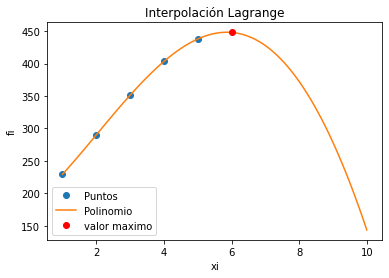

In [2]:

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([1, 2, 3, 4, 5])
fi = np.array([229.3, 290.05, 351.2, 403.25, 437.9])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 10
a = np.min(xi)
#! se extiende el espacio muestral a 10 dias
b = 10
#! para graficar
pxi = np.linspace(a,b,101)
pfi = px(pxi)

#! para conocer los valores maximos
pxi_2 = np.linspace(a,b,muestras) 
pfi_gr = px(pxi_2)


pfi_2 = list(pfi_gr)

valor_maximo = max(pfi_2)
idx = pfi_2.index(max(pfi_2))

dia_maximo = pxi_2[idx]

#! se obtiene el maximo de los evaluaciones de la funcion
print(f"el maximo valor es: {valor_maximo} y se obtiene en el dia {dia_maximo}\n")

# SALIDA
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.plot(dia_maximo,valor_maximo,'o',color="red",label="valor maximo")
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()


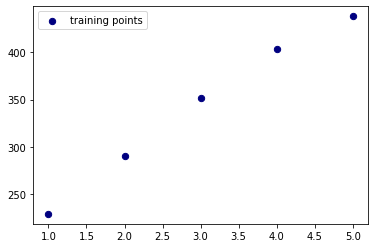

In [3]:
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x = np.array([1, 2, 3, 4, 5])
y = np.array([229.3, 290.05, 351.2, 403.25, 437.9])
########################################
plt.scatter(x, y, color='navy', s=40, marker='o', label='training points')
plt.legend(loc='upper left')
plt.show()

In [4]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 2) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 0.         79.31142857 -4.37857143], b = 152.5700000000005


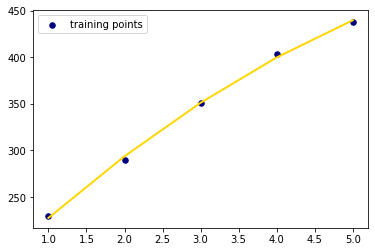

In [5]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o', label='training points')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='gold', linewidth=2)
######################### Agregamos y mostramos leyendas ##########################
plt.legend(loc='upper left')
plt.show()

dia maximo:9
acciones maximas: 512.4113


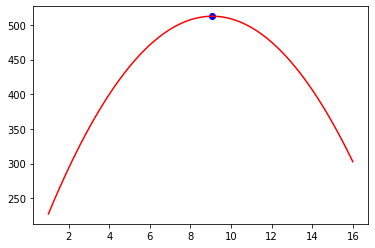

In [6]:
x = symbols("x")
fun = -4.37*x**2 + 79.31*x + 152.57
fun_l = sym.lambdify(x,fun)

nums = np.linspace(1,16,101)

nums_eval = list(map(fun_l,nums))

coe_a = -4.37
coe_b = 79.31
maximo_x = -coe_b/(2*coe_a)
maximo_y = max(nums_eval)

print(f"dia maximo:{int(maximo_x)}")
print(f"acciones maximas: {maximo_y}")

plt.plot(nums,nums_eval,color="red")
plt.scatter(maximo_x,maximo_y,color="blue")
plt.show()



# Actividad 2

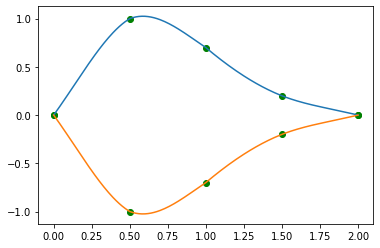

In [7]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

def cubic_interp1d(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)

    # remove non finite values
    # indexes = np.isfinite(x)
    # x = x[indexes]
    # y = y[indexes]

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

#x = 2, 1.5, 1, 0.5, 0, 0.5, 1, 1.5,2
#y = 0, 0.2, 0.7, 1, 0, -1, -0.7, -0.2, 0

x = np.array([2, 1.5, 1, 0.5, 0])
y = np.array([0, 0.2, 0.7, 1, 0])

xx = np.array([0,0.5, 1, 1.5, 2])
yy = np.array([0,-1, -0.7, -0.2, 0])
plt.scatter(x, y,color="green")
plt.scatter(xx,yy,color="green")

x_new = np.linspace(0, 2, 201)
plt.plot(x_new, cubic_interp1d(x_new, x, y))
plt.plot(x_new, cubic_interp1d(x_new, xx, yy))

plt.show()

#### ¿Qué tipo de interpolación, polinomial o spline, recomienda utilizar en este caso paraevitar el riesgo de oscilaciones?
* Para este caso se recomienda la interpolacion spline cubica, debido a la cantidad de datos y ademas existen dos puntos x,y que son iguales.

#### Dado que el primer y último punto de la tabla coinciden:  ¿Es posible utilizar interpolación mediante spline?
* No, puesto que al coincidir el primer y ultimo punto de la tabla no es posible realizar la interpolacion spline cubica, ahora, si esta se divide en dos si es posible su implementación.

### Actividad 3

x = [0.00000000e+00 4.88758553e-03 9.77517107e-03 ... 4.99022483e+00
 4.99511241e+00 5.00000000e+00]


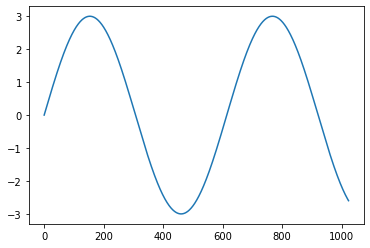

In [8]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
x = np.linspace(0, 5, 2**10,endpoint=True)
print("x =",x)
seno = 3*np.sin((2*np.pi*x)/3)
plt.plot(seno)
show()

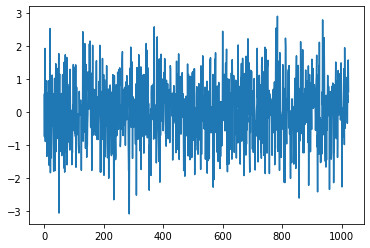

In [9]:
noise = np.random.normal(0,1,2**10)
plt.plot(noise)
show()

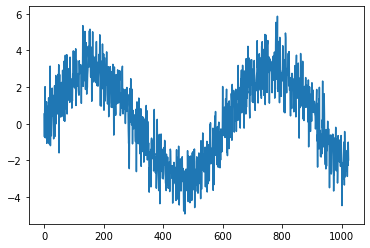

In [10]:
suma = seno + noise
plt.plot(suma)
show()

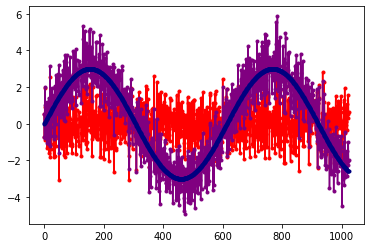

In [11]:
plt.plot(noise,color='red', marker='.', label='training points')
plt.plot(suma,color='purple', marker='.', label='training points')
plt.plot(seno,color='navy', marker='.', label='training points')
show()

In [12]:
import numpy.polynomial as P
n = 30
K = 2
x = suma
Nx = len(x)
yc = []
Nw = 2*n+1 # window size
No = n+1 # overlap

# compute weights
wa = []
wb = []
for i in range(0,No,1): # [0,...,64]
    wa.append(1-((i+1)-1)/n)
    wb.append(((i+1)-1)/n)

# compute the trend data
idNw = np.array(range(1,Nw+1,1))
#print("longitud idNw =",len(idNw))
idNwx = np.array(range(0,Nw,1))
#print("longitud idNwx =",len(idNwx))
p,coef = P.polynomial.polyfit(idNw, x[idNwx],K,full=True)
ya = P.polynomial.polyval(idNw,p)
#print("longitud ya =",len(ya))
yc[0:n] = ya[0:n]
for i in range(Nw-1,Nx,n):
    #print("[i] =",i)
    ni = n+i
    #print("ni =",ni)
    m = np.amin(np.array([ni,Nx-1]))
    #print("m =",m)
    idx = np.array(range(i-No+1,m+1,1))
    #print("idx =",idx)
    p,coef = P.polynomial.polyfit(idx,x[idx],K,full=True)
    yb = P.polynomial.polyval(idx,p)
    yc[i-No+1:i+1] = wa*ya[n:Nw]+wb*yb[0:n+1]
    #print("longitud yc =",len(yc))
    ya = yb
idyc = np.array(range(i,m+1,1))
p,coef = P.polynomial.polyfit(idyc, x[idyc],K,full=True)
yx = P.polynomial.polyval(idyc,p)
yc[i+1:m+1]=yx[i:m+1]

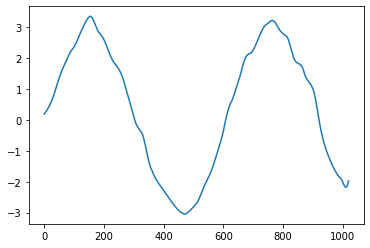

In [13]:
plt.plot(yc)

1024
1021
1021


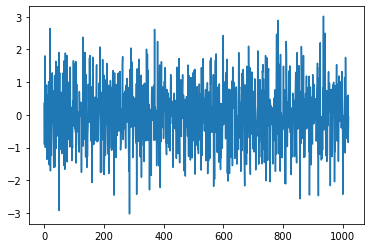

In [14]:

Detrend = np.array(suma[:-3]) - np.array(yc)
plt.plot(Detrend)

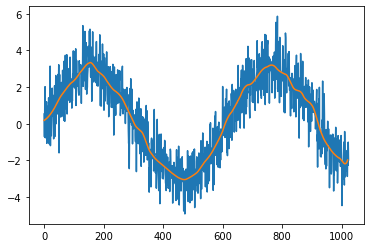

0.4517288181153033
0.4509996566988013
2.241387365386033
2.023632350757495


In [32]:
plt.plot(suma)
plt.plot(yc)
plt.show()

res,res_2 = 0,0
for i in range(len(yc)):
    res += suma[i]
    res_2 += yc[i]

prom_suma = res/len(suma[:-3])
prom_yc = res_2/len(yc)


des_s,des_yc = 0,0
i = 0
while i < 1021:
    des_s += (suma[i] - prom_suma)**2
    des_yc += (yc[i] - prom_yc)**2
    i += 1

desvi_su = (des_s/1021)**0.5
desvi_yc = (des_yc/1021)**0.5

print("promedios de grafica suma y suma interpolada")
print(prom_suma)
print(prom_yc)

print("desviaciones de grafica suma y suma interpolada")
print(desvi_su)
print(desvi_yc)

### Conlusiones

* Se puede ver que los gráficos de la actividad 1 obtienen estimaciones distintas debido al grado de exactitud de cada método y como cada uno trabaja con los datos dados.
* Con respecto a la actividad 2, no siempre un método es efectivo para todos los casos, se pudo apreciar que existen inconvenientes para realizar una curva cuando los puntos se repiten en ambos ejes, por lo que se requiere usar métodos que sean más óptimos para este tipo de casos.
* La actividad 3 nos presentó un caso de limpieza de datos, lo cual sirve para obtener y crear modelos que se ajusten a las funciones obtenidas cuando a estos datos se les quita el ruido con el que provienen.
* En general dependiendo del caso es más factible implementar un método que otro, como por ejemplo, dependiendo de la cantidad de datos ya no resulta factible implementar interpolación si hay más de 6 datos.
